In [15]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

import os
import sys
__file__ = './'
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), '..')))

# os.path.dirname(__file__)获取当前文件的绝对路径
# os.path.join(xx,'..')在后面追加..，相当于进入上一级目录
# os.path.abspath(xx)获取绝对路径
# sys.path.append()将其加入系统路径当中

import MSA
import LINK

In [16]:
# read data
my_link = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\small_net.xlsx', sheet_name='link_info')
my_link['I'] = 0
my_node = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\small_net.xlsx', sheet_name='node_info')
my_link['name'] = my_link['from'].astype('str') +'-'+ my_link['to'].astype('str')
my_demand = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\small_net.xlsx', sheet_name='demand_info')
print(my_demand)

  OD_pair  demand
0   r1-s1    1000


In [17]:
# set parameter
origin_zone = ['r1']
destination_zone = ['s1']
theta_1 = 1# path 
theta_2 = 0.5 # mode
miu_in = 25
miu_out = 30
lamda_0_hailing = 2 #2 RMB/minute
lamda_0_PR = 20 # RMB
lamda_0_transit = 5
N_hailing = 500
lamda_0_auto = LINK.compute_lamda_0_auto(fuel_consumption=8.5)

0.6517


In [18]:
res = MSA.assignment(my_link= my_link, my_node= my_node, my_demand= my_demand,
                    origin_zone= origin_zone, destination_zone= destination_zone,
                    miu_in= miu_in, miu_out= miu_out,
                    lamda_0_auto = lamda_0_auto,
                    lamda_0_hailing= lamda_0_hailing,
                    lamda_0_transit= lamda_0_transit,
                    lamda_0_PR= lamda_0_PR,
                    theta_1= theta_1, theta_2= theta_2,
                    N_hailing= N_hailing, A=2, maximum_iter=300)

['path-1', 'path-2', 'path-3', 'path-4']
['auto', 'P&R', 'transit', 'R&T']
Iteration = 1, gap = 1.3403711843802788,
the number of idle_hailing:500.0
Iteration = 2, gap = 9.161868338423204,
the number of idle_hailing:403.2627405822051
Iteration = 3, gap = 4.248503421886409,
the number of idle_hailing:400.7833156796852
Iteration = 4, gap = 2.7417805356012406,
the number of idle_hailing:400.64519151523336
Iteration = 5, gap = 2.014724460702682,
the number of idle_hailing:400.6043964395456
Iteration = 6, gap = 1.5881257093620063,
the number of idle_hailing:400.58054232153427
Iteration = 7, gap = 1.3082873514597873,
the number of idle_hailing:400.56469831074304
Iteration = 8, gap = 1.1109057474020845,
the number of idle_hailing:400.5535106277439
Iteration = 9, gap = 0.9643844464599163,
the number of idle_hailing:400.545257756128
Iteration = 10, gap = 0.8514068313962386,
the number of idle_hailing:400.5389618517423
Iteration = 11, gap = 0.7616976418349601,
the number of idle_hailing:400.5340

In [19]:
# RMSE
RMSE = res[0]

# idle ride-hailing vehicle number
ride_hailing = res[5]

# market share
mode = res[4]

# path flow
path = res[2]
path = path[['I','path_id', 'mode', 'path_flow', 'path_cost']]
path['path_cost'] = abs(path['path_cost'])

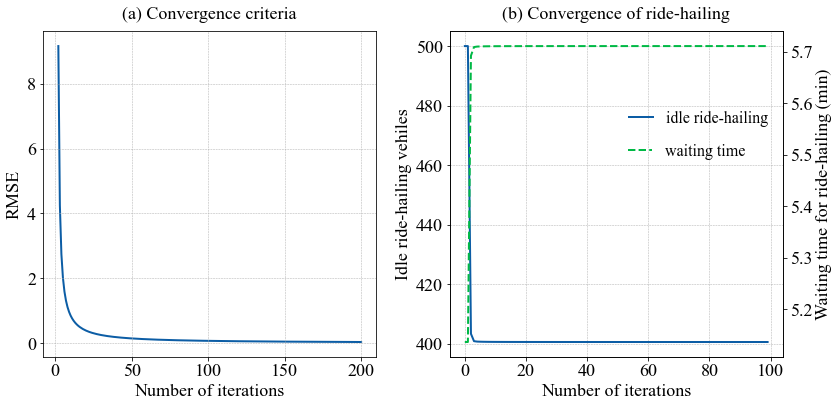

In [20]:
num_loc = 200
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18

fig = plt.figure(figsize=(12,6))
ax1 = plt.subplot(1,2,1)
ax1.grid(ls = '--', lw = 0.5, zorder = 0)
ax1.plot(RMSE['I'].iloc[1:num_loc], RMSE['RMSE'].iloc[1:num_loc], '-', lw = 2, color='#0c5DA5', label='RMSE', markersize=5, zorder =1)
#ax1.set_xticks(np.arange(5, 105, 10))
#ax1.set_xlim(0, 101)
#ax1.set_yticks(np.arange(0, 0.55, 0.05))
#ax1.set_ylim(0, 0.5)
ax1.set_xlabel('Number of iterations')
ax1.set_ylabel('RMSE')
ax1.set_title('(a) Convergence criteria', fontsize=18, loc = 'center', y=1.02)

ax2 = plt.subplot(1,2,2)
ax2.grid(ls = '--', lw = 0.5)
ax2.plot(ride_hailing['I'].iloc[:100], ride_hailing['n_idle'].iloc[:100], '-', lw = 2, color='#0c5DA5', label='idle ride-hailing', markersize=5)
ax2.set_xlabel('Number of iterations')
ax2.set_ylabel('Idle ride-hailing vehiles')
# ax2.set_xticks(np.arange(5, 31, 5))
# ax2.set_xlim(0.5, 30.5)
# ax2.set_yticks(np.arange(155,210, 5))
# ax2.set_ylim(150,205)
ax2.set_title('(b) Convergence of ride-hailing', fontsize=18, y= 1.02)

ax3 = plt.twinx(ax2)
ax3.plot(ride_hailing['I'].iloc[:100], ride_hailing['wait_time'].iloc[:100], '--', lw = 2, color='#00B945', label='waiting time', markersize=4)
# ax3.set_yticks(np.arange(3.9, 4.7, 0.1))
# ax3.set_ylim(3.8,4.6)
ax3.set_ylabel('Waiting time for ride-hailing (min)')

ax2.legend(loc='best', fontsize=16, frameon=False, handlelength=1.5, bbox_to_anchor=(1, 0.8))
ax3.legend(loc='best', fontsize=16, frameon=False, handlelength=1.5, bbox_to_anchor=(0.93, 0.7))

plt.tight_layout()

plt.show()

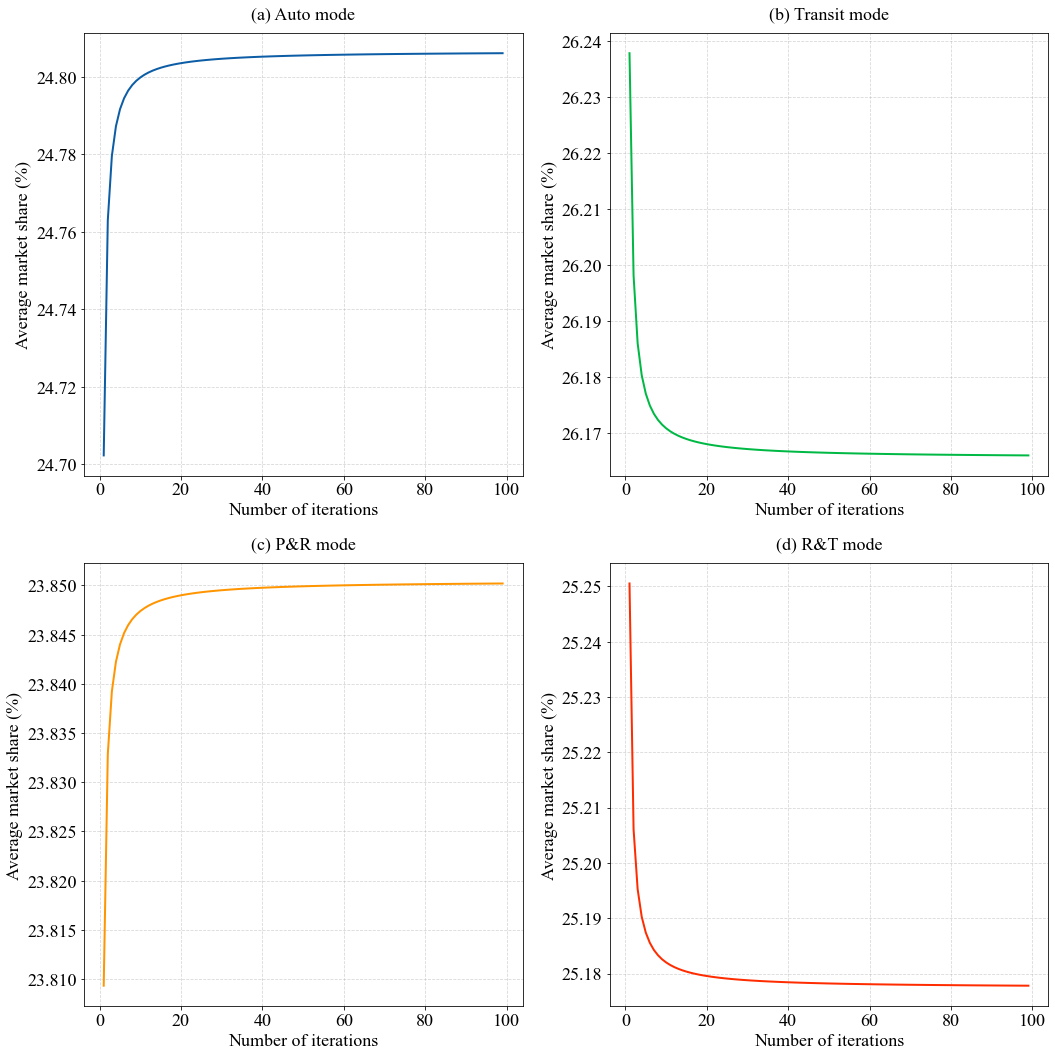

In [21]:
# market share
num_loc = 100
#plt.ticklabel_format(style='plain')

fig,ax = plt.subplots(2,2, figsize=(15,15))
ax = ax.flatten()

ax1 = ax[0]
ax1.ticklabel_format(useOffset=False)
ax1.grid(ls='--', alpha = 0.5)
ax1.plot(mode[mode['mode'] == 'auto'].iloc[1:num_loc]['I'], 
         mode[mode['mode'] == 'auto'].iloc[1:num_loc]['mode_logit']*100, 
         '-', color='#0c5DA5', label='Auto', markersize=5, lw=2)
# ax1.set_xticks(np.arange(0, 205, 20))
# ax1.set_xlim(0.5, 50.5)
# ax1.set_yticks(np.arange(296.8, 298.4, 0.2))
#ax1.set_ylim(36.125,36.127)
ax1.set_xlabel('Number of iterations')
ax1.set_ylabel('Average market share (%)')
ax1.set_title('(a) Auto mode', fontsize=18, loc='center', y=1.02)

ax2 = ax[1]
ax2.ticklabel_format(useOffset=False)
ax2.grid(ls='--', alpha = 0.5)
ax2.plot(mode[mode['mode'] == 'transit'].iloc[1:num_loc]['I'], 
         mode[mode['mode'] == 'transit'].iloc[1:num_loc]['mode_logit']*100, 
         '-', color='#00b945', label='Transit', markersize=5, lw=2)
# ax1.set_xticks(np.arange(0, 205, 20))
# ax1.set_xlim(0.5, 50.5)
# ax1.set_yticks(np.arange(296.8, 298.4, 0.2))
#ax2.set_ylim(21.2512,21.2518)
ax2.set_xlabel('Number of iterations')
ax2.set_ylabel('Average market share (%)')
ax2.set_title('(b) Transit mode', fontsize=18, loc='center', y=1.02)

ax3 = ax[2]
ax3.ticklabel_format(useOffset=False)
ax3.grid(ls='--', alpha = 0.5)
ax3.plot(mode[mode['mode'] == 'P&R'].iloc[1:num_loc]['I'], 
         mode[mode['mode'] == 'P&R'].iloc[1:num_loc]['mode_logit']*100, 
         '-', color='#ff9500', label='P&R', markersize=5, lw=2)
# ax1.set_xticks(np.arange(0, 205, 20))
# ax1.set_xlim(0.5, 50.5)
# ax1.set_yticks(np.arange(296.8, 298.4, 0.2))
#ax3.set_ylim(19.7795,19.7810)
ax3.set_xlabel('Number of iterations')
ax3.set_ylabel('Average market share (%)')
ax3.set_title('(c) P&R mode', fontsize=18, loc='center', y=1.02)

ax4 = ax[3]
ax4.ticklabel_format(useOffset=False)
ax4.grid(ls='--', alpha = 0.5)
ax4.plot(mode[mode['mode'] == 'R&T'].iloc[1:num_loc]['I'], 
         mode[mode['mode'] == 'R&T'].iloc[1:num_loc]['mode_logit']*100, 
         '-', color='#ff2c00', label='R&T', markersize=5, lw=2)
# ax1.set_xticks(np.arange(0, 205, 20))
# ax1.set_xlim(0.5, 50.5)
# ax1.set_yticks(np.arange(296.8, 298.4, 0.2))
#ax4.set_ylim(22.8405,22.8440)
ax4.set_xlabel('Number of iterations')
ax4.set_ylabel('Average market share (%)')
ax4.set_title('(d) R&T mode', fontsize=18, loc='center', y=1.02)

plt.tight_layout()

plt.show()

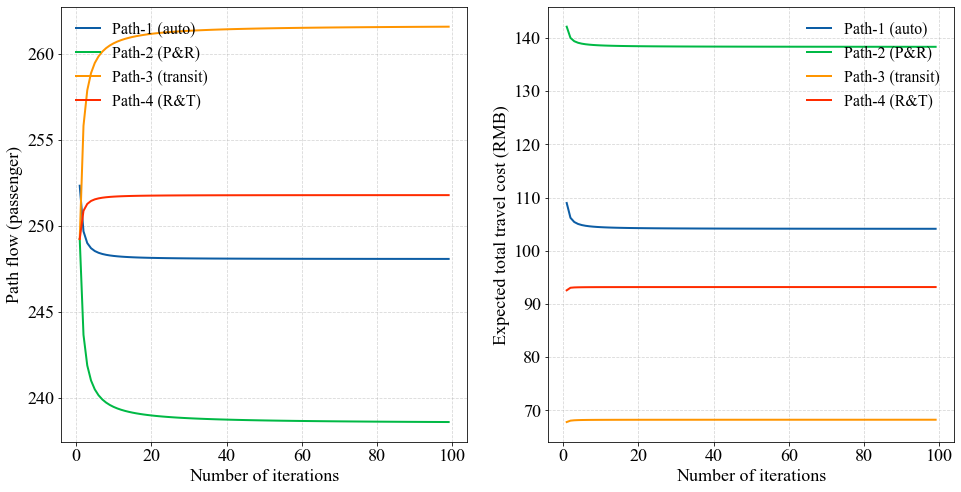

In [22]:
# market share
num_loc = 100
#plt.ticklabel_format(style='plain')

fig = plt.figure(figsize=(16,8))
ax = plt.subplot(1,2,1)

ax.ticklabel_format(useOffset=False)
ax.grid(ls='--', alpha = 0.5)
ax.plot(path[path['path_id']=='path-1'].iloc[1:num_loc]['I'], 
        path[path['path_id']=='path-1'].iloc[1:num_loc]['path_flow'], 
        '-', color='#0c5DA5', label='Path-1 (auto)', markersize=5, lw=2)

ax.plot(path[path['path_id']=='path-2'].iloc[1:num_loc]['I'], 
        path[path['path_id']=='path-2'].iloc[1:num_loc]['path_flow'], 
        '-', color='#00b945', label='Path-2 (P&R)', markersize=5, lw=2)

ax.plot(path[path['path_id']=='path-3'].iloc[1:num_loc]['I'], 
        path[path['path_id']=='path-3'].iloc[1:num_loc]['path_flow'], 
        '-', color='#ff9500', label='Path-3 (transit)', markersize=5, lw=2)

ax.plot(path[path['path_id']=='path-4'].iloc[1:num_loc]['I'], 
        path[path['path_id']=='path-4'].iloc[1:num_loc]['path_flow'], 
        '-', color='#ff2c00', label='Path-4 (R&T)', markersize=5, lw=2)

ax.set_xlabel('Number of iterations')
ax.set_ylabel('Path flow (passenger)')
ax.legend(loc='best', fontsize=16, frameon=False, handlelength=1.5)

##################################################################################
ax2 = plt.subplot(1,2,2)
ax2.ticklabel_format(useOffset=False)
ax2.grid(ls='--', alpha = 0.5)
ax2.plot(path[path['path_id']=='path-1'].iloc[1:num_loc]['I'], 
        path[path['path_id']=='path-1'].iloc[1:num_loc]['path_cost'], 
        '-', color='#0c5DA5', label='Path-1 (auto)', markersize=5, lw=2)

ax2.plot(path[path['path_id']=='path-2'].iloc[1:num_loc]['I'], 
        path[path['path_id']=='path-2'].iloc[1:num_loc]['path_cost'], 
        '-', color='#00b945', label='Path-2 (P&R)', markersize=5, lw=2)

ax2.plot(path[path['path_id']=='path-3'].iloc[1:num_loc]['I'], 
        path[path['path_id']=='path-3'].iloc[1:num_loc]['path_cost'], 
        '-', color='#ff9500', label='Path-3 (transit)', markersize=5, lw=2)

ax2.plot(path[path['path_id']=='path-4'].iloc[1:num_loc]['I'], 
        path[path['path_id']=='path-4'].iloc[1:num_loc]['path_cost'], 
        '-', color='#ff2c00', label='Path-4 (R&T)', markersize=5, lw=2)

ax2.set_xlabel('Number of iterations')
ax2.set_ylabel('Expected total travel cost (RMB)')
ax2.legend(loc='best', fontsize=16, frameon=False, handlelength=1.5)

plt.show()

In [23]:
path[path['path_id'] == 'path-3']

,I,path_id,mode,path_flow,path_cost
2,0,path-3,transit,250.000000,5.000000
6,1,path-3,transit,249.226136,67.811082
10,2,path-3,transit,255.802467,68.069552
14,3,path-3,transit,257.862024,68.140016
18,4,path-3,transit,258.861483,68.171944
...,...,...,...,...,...
1186,296,path-3,transit,261.624352,68.245360
1190,297,path-3,transit,261.624460,68.245361
1194,298,path-3,transit,261.624567,68.245363
1198,299,path-3,transit,261.624673,68.245364


In [24]:
mode

,mode,path_logsum,exp_logsum,mode_logit,I
0,P&R,0.668460,0.334230,0.249226,0
1,R&T,0.668460,0.334230,0.249226,0
2,auto,0.693147,0.346574,0.252322,0
3,transit,0.668460,0.334230,0.249226,0
4,P&R,0.216249,0.108125,0.238093,1
...,...,...,...,...,...
1199,transit,0.409042,0.204521,0.261656,299
1200,P&R,0.223749,0.111874,0.238504,300
1201,R&T,0.332054,0.166027,0.251775,300
1202,auto,0.302355,0.151178,0.248064,300


In [25]:
res[3][['path_id','path_cost']].head(10)

,path_id,path_cost
0,path-1,-0.000000
1,path-2,-5.000000
2,path-3,-5.000000
3,path-4,-5.000000
4,path-1,-108.982541
5,path-2,-142.125171
6,path-3,-67.811082
7,path-4,-92.572472
8,path-1,-106.201841
9,path-2,-140.015257


In [26]:
path.head(10)

,I,path_id,mode,path_flow,path_cost
0,0,path-1,auto,250.000000,0.000000
1,0,path-2,P&R,250.000000,5.000000
2,0,path-3,transit,250.000000,5.000000
3,0,path-4,R&T,250.000000,5.000000
4,1,path-1,auto,252.321591,108.982541
5,1,path-2,P&R,249.226136,142.125171
6,1,path-3,transit,249.226136,67.811082
7,1,path-4,R&T,249.226136,92.572472
8,2,path-1,auto,249.672250,106.201841
9,2,path-2,P&R,243.659721,140.015257


In [27]:
pd.set_option('display.max_columns', None) 
res[2][res[2]['I'] == 3]

,OD_pair,demand,path_id,name_sque,attribute_set,path_length,path_duration,path_cost,mode,mode_logit,mode_flow,path_logit,y_flow,I,path_flow
12,r1-s1,1000,path-1,"[r1-N1, N1-N2, N2-N3, N3-s1]","[board_auto, auto, alight_auto]",20.0,34.355299,-105.414653,auto,0.247796,247.795552,1.0,247.795552,3,248.991399
13,r1-s1,1000,path-2,"[r1-N1, N1-N2, N2-N5, N5-N6, N6-s1]","[board_auto, auto, P&R, transit, alight_transit]",21.8,123.744465,-139.397611,P&R,0.238392,238.392233,1.0,238.392233,3,241.882623
14,r1-s1,1000,path-3,"[r1-N4, N4-N5, N5-N6, N6-s1]","[board_transit, transit, alight_transit]",22.0,144.250325,-68.140016,transit,0.261860,261.859857,1.0,261.859857,3,257.862024
15,r1-s1,1000,path-4,"[r1-N7, N7-N8, N8-N5, N5-N6, N6-s1]","[board_ride-hailing, ride-hailing, R&T, transi...",21.0,119.384546,-93.112165,R&T,0.251952,251.952357,1.0,251.952357,3,251.263953


In [28]:
res[1][res[1]['I'] == 3]

,link_id,from,to,type,attribute,c_a,l_a,f_bus,t_0,travel,fare_rate,walk,wait,congestion,penalty,flow,I,name
36,1,N1,N2,physical,auto,300,10.0,0,10.0,20.751930,55.027893,0.000000,0.000000,0.000000,0,490.874023,3,N1-N2
37,2,N2,N3,physical,auto,200,10.0,0,10.0,13.603368,36.072052,0.000000,0.000000,0.000000,0,248.991399,3,N2-N3
38,3,N2,N5,pseudo,P&R,300,0.8,10,5.0,5.316953,20.000000,5.000000,6.000000,0.000000,12,241.882623,3,N2-N5
39,4,N4,N5,physical,transit,200,10.0,4,30.0,30.000000,0.000000,0.000000,0.000000,1.860457,0,257.862024,3,N4-N5
40,5,N5,N6,physical,transit,250,10.0,4,30.0,30.000000,0.000000,0.000000,0.000000,45.961296,0,751.008601,3,N5-N6
41,6,N8,N5,pseudo,R&T,0,0.0,10,0.0,0.000000,0.000000,3.000000,6.000000,0.000000,12,251.263953,3,N8-N5
42,7,N7,N8,physical,ride-hailing,200,10.0,0,15.0,15.000000,30.000000,0.000000,0.000000,0.000000,0,251.263953,3,N7-N8
43,8,r1,N1,pseudo,board_auto,0,0.0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0,490.874023,3,r1-N1
44,9,N3,s1,pseudo,alight_auto,0,0.0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0,248.991399,3,N3-s1
45,10,r1,N4,pseudo,board_transit,0,1.0,4,0.0,0.000000,0.000000,10.714286,15.000000,0.000000,0,257.862024,3,r1-N4
